# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
data.fillna(value='', inplace=True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

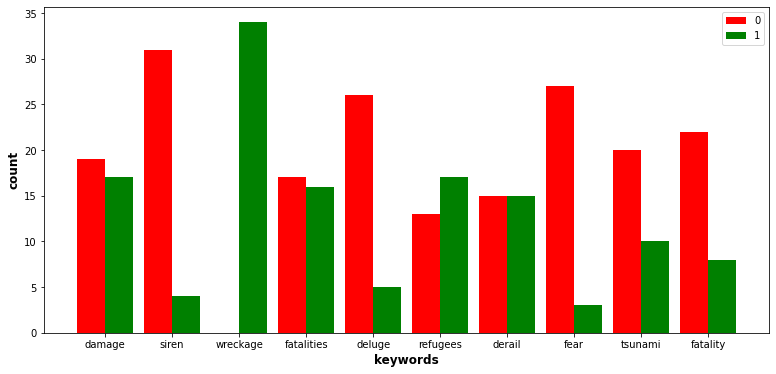

In [ ]:
frequent10 = train['keyword'].value_counts().drop('')[:10].index.to_list()
frequent10values = np.asarray(train['keyword'].value_counts().drop('')[:10])

index = np.arange(10)

values1 = np.asarray(train[train['target'] == 1]['keyword'].value_counts().drop('')[frequent10])
values0 = frequent10values - values1

bw = 0.42

plt.figure(figsize=(13,6))
plt.bar(index, values0, bw, color='r')
plt.bar(index + bw, values1, bw, color='g')
plt.xlabel('keywords', fontsize=12, fontweight='bold')
plt.ylabel('count', fontsize=12, fontweight='bold')
plt.xticks(index + 0.5 * bw, frequent10)
plt.legend(['0', '1'])
plt.show()

Видим, что класс 0 чуть более выражен: для каждого значения **keywords** красный столбец либо сильно превышает зеленый, либо находится практически на одном уровне с ним. Но это не касается значения *wreckage*: здесь класс 0 вообще не представлен. Всё потому, что в самом датасете при ключевом слове *wreckage* целевая переменная принимает только значение 1.

In [ ]:
data.groupby('keyword')['target'].value_counts()[-3:-2]

keyword   target
wreckage  1         39
Name: target, dtype: int64

## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train['tweet'] = train['keyword'].str.cat([train['location'], train['text']], sep=' ')
train.drop(columns=['id', 'keyword', 'location', 'text'], inplace=True)

In [ ]:
test['tweet'] = test['keyword'].str.cat([test['location'], test['text']], sep=' ')
test.drop(columns=['id', 'keyword', 'location', 'text'], inplace=True)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x_train = train['tweet']
y_train = np.asarray(train['target'])

In [ ]:
x_test = test['tweet']
y_test = np.asarray(test['target'])

In [ ]:
vec = CountVectorizer()
bow = vec.fit_transform(x_train)

In [ ]:
bow

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
import re

In [ ]:
list(vec.vocabulary_.keys())

['bridge',
 '20collapse',
 'ashes',
 '2015',
 'australia',
 'ûªs',
 'collapse',
 'at',
 'trent',
 'among',
 'worst',
 'in',
 'history',
 'england',
 'bundled',
 'out',
 'for',
 '60',
 'http',
 'co',
 't5trhjuau0',
 'hail',
 'carol',
 'stream',
 'illinois',
 'great',
 'michigan',
 'technique',
 'camp',
 'b1g',
 'thanks',
 'to',
 'bmurph1019',
 'hail_youtsey',
 'termn8r13',
 'goblue',
 'wrestleon',
 'oaskgki6qj',
 'police',
 'houston',
 'cnn',
 'tennessee',
 'movie',
 'theater',
 'shooting',
 'suspect',
 'killed',
 'by',
 'di8elzswnr',
 'rioting',
 'still',
 'couple',
 'of',
 'hours',
 'left',
 'until',
 'have',
 'be',
 'up',
 'class',
 'wounds',
 'lake',
 'highlands',
 'crack',
 'the',
 'path',
 'where',
 'wiped',
 'this',
 'morning',
 'during',
 'beach',
 'run',
 'surface',
 'on',
 'elbow',
 'and',
 'right',
 'knee',
 'yaqrsximph',
 'airplane',
 '20accident',
 'somewhere',
 'there',
 'experts',
 'france',
 'begin',
 'examining',
 'debris',
 'found',
 'reunion',
 'island',
 'french',
 '

In [ ]:
def answers(vocabulary: dict):
    vocabulary = list(vocabulary.keys())

    digits = [word for word in vocabulary if re.search('\d', word) is not None]
    print(f'В словаре нашлось {len(digits)} слов, содержащих цифры')

    punct = [word for word in vocabulary if re.search('[!"#$%&\'()*+,-./:;<=>?@[\\]_`{|}~^]', word) is not None]
    print(f'В словаре нашлось {len(punct)} слов, содержащих символы пунктуации')

    hashtags = [word for word in vocabulary if re.match('#', word) is not None]
    print(f'В словаре нашлось {len(hashtags)} хэштегов')

    mentions = [word for word in vocabulary if re.match('@', word) is not None]
    print(f'В словаре нашлось {len(mentions)} упоминаний')

In [ ]:
answers(vec.vocabulary_)

В словаре нашлось 3812 слов, содержащих цифры
В словаре нашлось 315 слов, содержащих символы пунктуации
В словаре нашлось 0 хэштегов
В словаре нашлось 0 упоминаний


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
tweet_bow = tweet_vec.fit_transform(x_train)

In [ ]:
tweet_bow

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [ ]:
answers(tweet_vec.vocabulary_)

В словаре нашлось 3939 слов, содержащих цифры
В словаре нашлось 7337 слов, содержащих символы пунктуации
В словаре нашлось 1470 хэштегов
В словаре нашлось 1679 упоминаний


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omicr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def CustomTokenizer(text: str) -> list:
    tokens = TweetTokenizer().tokenize(text.lower())

    # избавляемся от спецсимволов, кроме хэштегов и смайликов
    tokens = np.vectorize(lambda token: re.sub('\W+' , '', token)
                                        if re.match('#', token) is None and re.search('[()]', token) is None
                                        else token)(tokens)
    tokens = [token for token in tokens if token != '']

    # удаляем токены, содержащие цифры
    tokens = [token for token in tokens if re.search('\d', token) is None]

    # удаляем всякий шум
    tokens = [token for token in tokens if token not in stopwords.words('english')]

    # проводим стемминг
    tokens = [SnowballStemmer('english').stem(token) for token in tokens]

    return tokens

In [ ]:
train['tweet'].to_list()[:10]

['bridge%20collapse  Ashes 2015: Australia\x89Ûªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0',
 'hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @bmurph1019 \n@hail_Youtsey . @termn8r13 \n#GoBlue #WrestleOn http://t.co/OasKgki6Qj',
 'police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR',
 'rioting  Still rioting in a couple of hours left until I have to be up for class.',
 'wounds Lake Highlands Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph',
 'airplane%20accident Somewhere Out There Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on... http://t.co/TagZbcXFj0 #MLB',
 "bloody Isolated City In World Perth 'I came to kill Indians...for FUN': Video of smirking and remorseless Pakistani killer shows him boas

In [ ]:
for i in range(10):
    print(np.vectorize(CustomTokenizer)(train['tweet'].to_list()[i]))

['bridg' 'ash' 'australia' 'ûªs' 'collaps' 'trent' 'bridg' 'among' 'worst'
 'histori' 'england' 'bundl' 'australia']
['hail' 'carol' 'stream' 'illinoi' 'great' 'michigan' 'techniqu' 'camp'
 'thank' 'hail_youtsey' '#goblu' '#wrestleon']
['polic' 'houston' 'cnn' 'tennesse' 'movi' 'theater' 'shoot' 'suspect'
 'kill' 'polic']
['riot' 'still' 'riot' 'coupl' 'hour' 'left' 'class']
['wound' 'lake' 'highland' 'crack' 'path' 'wipe' 'morn' 'beach' 'run'
 'surfac' 'wound' 'left' 'elbow' 'right' 'knee' 'httptcoyaqrsximph']
['airplan' 'somewher' 'expert' 'franc' 'begin' 'examin' 'airplan' 'debri'
 'found' 'reunion' 'island' 'french' 'air' 'accid' 'expert' '#mlb']
['bloodi' 'isol' 'citi' 'world' 'perth' 'came' 'kill' 'indian' 'fun'
 'video' 'smirk' 'remorseless' 'pakistani' 'killer' 'show' 'boast'
 'httptcofpjlwoxklg']
['burn' 'johnsontionn' 'except' 'idk' 'realli' 'burn']
['destroy' '(' 'ask' ')' 'destroy' 'hous']
['wound' 'maracay' 'nirgua' 'venezuela' 'polic' 'offic' 'wound' 'suspect'
 'dead' 'ex

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
custom_vec = CountVectorizer(tokenizer=CustomTokenizer).fit(x_train)

custom_bow_train = custom_vec.transform(x_train)
custom_bow_test = custom_vec.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
clf_vec = LogisticRegression().fit(custom_bow_train, y_train)
y_pred = clf_vec.predict(custom_bow_test)
print(f'f1-мера для CountVectorizer равна {f1_score(y_test, y_pred)}')

f1-мера для CountVectorizer равна 0.7534833869239014


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=CustomTokenizer).fit(x_train)

tfidf_bow_train = tfidf_vec.transform(x_train)
tfidf_bow_test = tfidf_vec.transform(x_test)

In [ ]:
clf_tfidf_vec = LogisticRegression().fit(tfidf_bow_train, y_train)
y_tfidf_pred = clf_tfidf_vec.predict(tfidf_bow_test)
print(f'f1-мера для TfidfVectorizer равна {f1_score(y_test, y_tfidf_pred)}')

f1-мера для TfidfVectorizer равна 0.7421314191054665


In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=CustomTokenizer, max_df=0.9).fit(x_train)

tfidf_bow_train = tfidf_vec.transform(x_train)
tfidf_bow_test = tfidf_vec.transform(x_test)

In [ ]:
clf_tfidf_vec = LogisticRegression().fit(tfidf_bow_train, y_train)
y_tfidf_pred = clf_tfidf_vec.predict(tfidf_bow_test)
print(f'f1-мера для TfidfVectorizer равна {f1_score(y_test, y_tfidf_pred)}')

f1-мера для TfidfVectorizer равна 0.7421314191054665


In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=CustomTokenizer, min_df=25).fit(x_train)

tfidf_bow_train = tfidf_vec.transform(x_train)
tfidf_bow_test = tfidf_vec.transform(x_test)

In [ ]:
clf_tfidf_vec = LogisticRegression().fit(tfidf_bow_train, y_train)
y_tfidf_pred = clf_tfidf_vec.predict(tfidf_bow_test)
print(f'f1-мера для TfidfVectorizer равна {f1_score(y_test, y_tfidf_pred)}')

f1-мера для TfidfVectorizer равна 0.7278617710583154


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
hash_vec = HashingVectorizer(tokenizer=CustomTokenizer, n_features=5000).fit(x_train)

hash_bow_train = hash_vec.transform(x_train)
hash_bow_test = hash_vec.transform(x_test)

In [ ]:
clf_hash_vec = LogisticRegression().fit(hash_bow_train, y_train)
y_hash_pred = clf_hash_vec.predict(hash_bow_test)
print(f'f1-мера для HashingVectorizer равна {f1_score(y_test, y_hash_pred)}')

f1-мера для HashingVectorizer равна 0.7226236798221234


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [ ]:
clf_vec = LogisticRegression(C=0.4, class_weight='balanced').fit(custom_bow_train, y_train)
y_pred = clf_vec.predict(custom_bow_test)
print(f'f1-мера равна {f1_score(y_test, y_pred)}')

f1-мера равна 0.7589424572317262


**Оценка: 10 / 10**

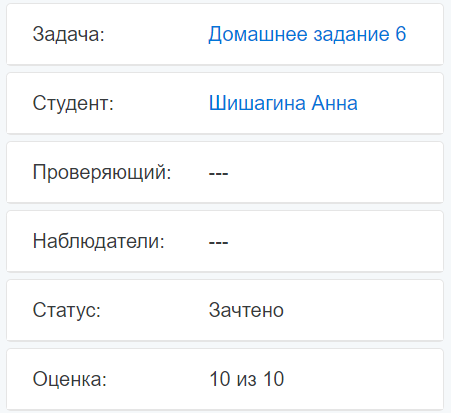